In [1]:
import fastshap_wrapper as fw

In [2]:
from cifar10_experiment import CIFAR10AugmentationExperiment

In [3]:
import torchvision

In [4]:
transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

In [5]:
c = CIFAR10AugmentationExperiment(transform)
c.train(nepoch=1, batch_size=256)

Files already downloaded and verified
Files already downloaded and verified


Training loop:   0%|          | 0/195 [00:00<?, ?it/s]

----- Epoch = 1 -----
Val loss = 1.1658
Val acc = 0.5819

New best epoch, acc = 0.5819



In [6]:
c.train_set

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [7]:
c.val_hist

[0.5819000000000001]

In [8]:
%%time
results = fw.fastshap_wrapper(c.model, c.train_set, c.test_set, surrogate_epochs=1, explainer_epochs=1, experiment_name='test2')

Loading saved surrogate model
Loading saved explainer model
CPU times: user 56.8 ms, sys: 70.8 ms, total: 128 ms
Wall time: 20.1 s


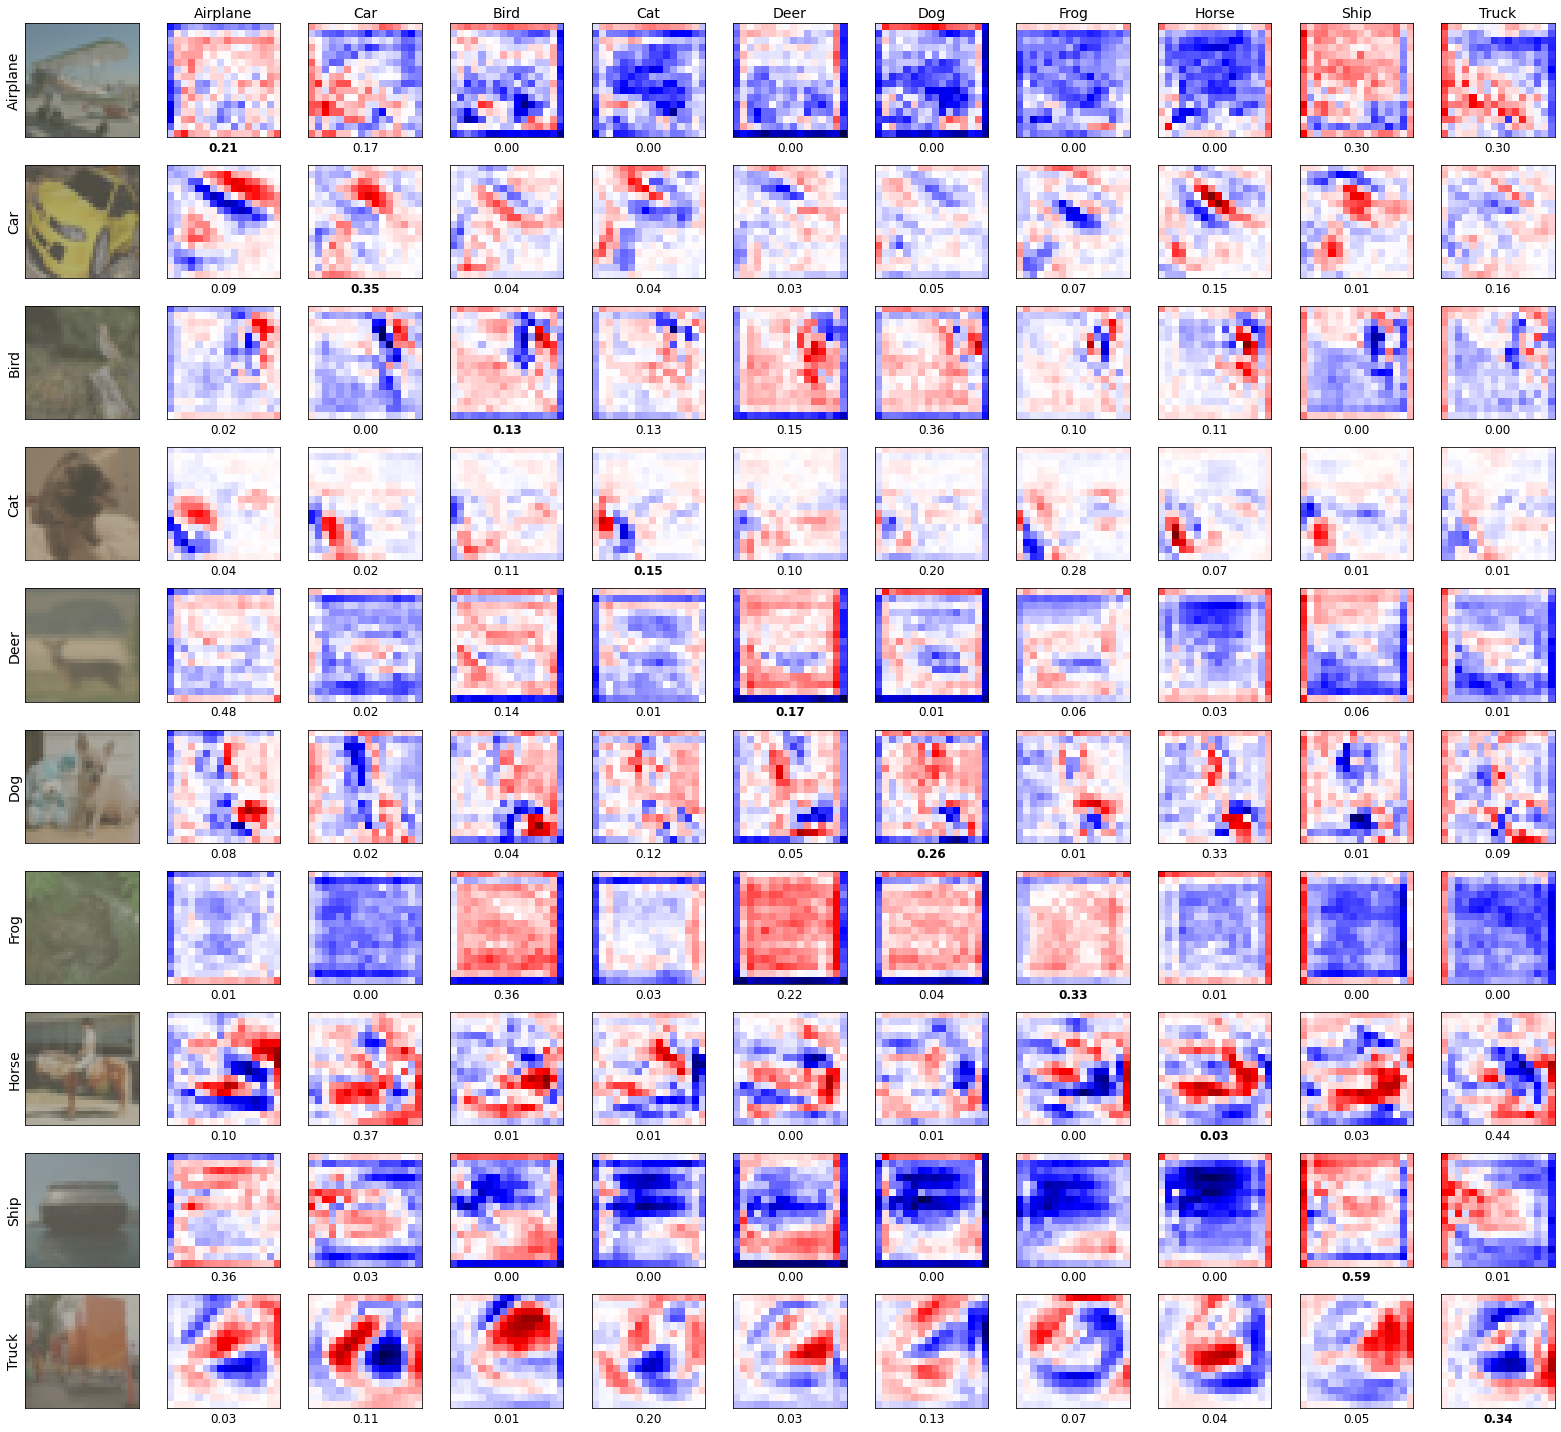

In [9]:
results.plot_results(c.test_set)